In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas.plotting import scatter_matrix
from sklearn.ensemble import BaggingClassifier

In [81]:
cleveland = pd.read_csv('processed.cleveland.data',header=None)
labels = [  'age',
            'sex', 
            'cpx',     
            'trestbps', 
            'chol',  
            'fbs', 
            'restecg',
            'thalach', 
            'exang', 
            'oldpeak', 
            'slope',
            'ca', 
            'thal',
            'num']
cleveland.columns = labels
cleveland['target'] = (cleveland.num)
cleveland.head()

,age,sex,cpx,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [82]:
cleveland.ca = list(map(lambda x : float(x) if x!='?' else None,cleveland.ca))
cleveland.thal = list(map(lambda x : float(x) if x!='?' else None,cleveland.thal))
cleveland = cleveland.dropna()

In [83]:
targetLabels = cleveland.target.unique()
targetLabels.sort()

In [84]:
feats = cleveland.columns[:-2]
print(feats)
print(cleveland.shape)

Index(['age', 'sex', 'cpx', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
(297, 15)


# Figure 8.8

In [85]:
all_train,all_test = train_test_split(cleveland,test_size =0.33)
print(all_test.shape)

(99, 15)


In [104]:
arb = tree.DecisionTreeClassifier()
arb.fit(all_train[feats],all_train.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
randomforestTest = []
baggingTest = []
randomforestOOB = []
baggingOOB = []
for numTrees in range(1,301):
    print(numTrees)
    rf = RandomForestClassifier(n_estimators=numTrees,oob_score=True)
    rf.fit(all_train[feats],all_train.target)
    bc = BaggingClassifier(n_estimators=numTrees, oob_score=True)
    bc.fit(all_train[feats],all_train.target)
    
    randomforestTest.append(1-accuracy_score(all_test.target,rf.predict(all_test[feats])))
    baggingTest.append(1-accuracy_score(all_test.target,bc.predict(all_test[feats])))
    randomforestOOB.append(1-rf.oob_score_)
    baggingOOB.append(1-bc.oob_score_)

1
2
3
4
5
6
7
8
9
10


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs d

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
2

Text(0,0.5,'Error')

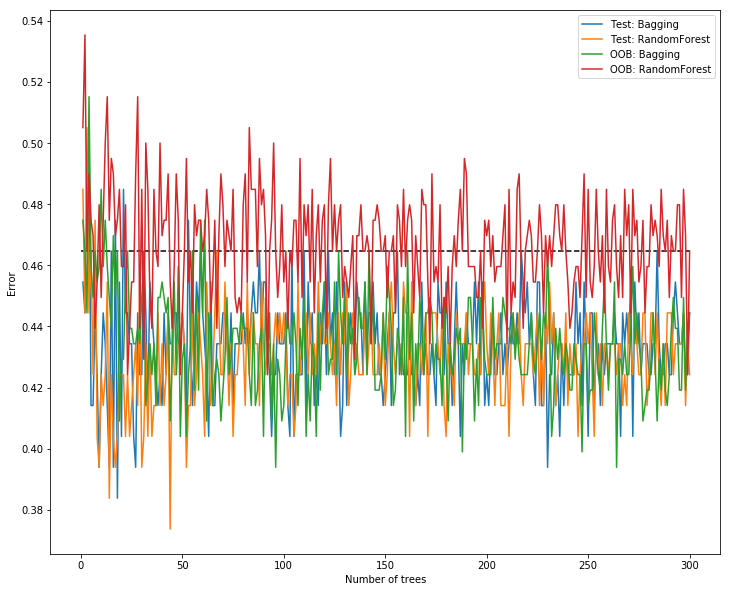

In [106]:
fig = plt.figure(figsize = (12,10))
arbscore = 1-accuracy_score(all_test.target,arb.predict(all_test[feats]))
plt.plot([0,300],[arbscore,arbscore],c='black',linestyle = '--')
plt.plot(range(1,301),baggingTest,label='Test: Bagging')

plt.plot(range(1,301),randomforestTest,label='Test: RandomForest')
plt.plot(range(1,301),randomforestOOB,label='OOB: Bagging')
plt.plot(range(1,301),baggingOOB,label='OOB: RandomForest')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Error')

# Figure 8.10

In [13]:
oj = pd.read_csv('OJ.csv')
oj['target'] = list(map(lambda x: 0 if x=='CH' else 1, oj.Purchase))
# oj.Store7 = list(map(lambda x: 0 if x=="No" else 1, oj.Store7))
oj = oj.drop(['Store7'],axis=1)
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,target
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,0
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,0
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,0
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0


In [14]:
feats = oj.columns[2:-1]
print(feats)

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')


In [15]:
all_train, all_test = train_test_split(oj,test_size= 0.25)

In [17]:
errorp = []
errorpHalf= []
errorRootP = []
p = len(feats)
for numTrees in range(1,511,10):
    print(numTrees)
    pclf= RandomForestClassifier(n_estimators=numTrees,max_features=p)
    phalfclf= RandomForestClassifier(n_estimators=numTrees,max_features=int(p/2))
    rootpclf= RandomForestClassifier(n_estimators=numTrees,max_features='sqrt')
    
    pclf.fit(all_train[feats],all_train.target)
    phalfclf.fit(all_train[feats],all_train.target)
    rootpclf.fit(all_train[feats],all_train.target)
    
    errorp.append(1-accuracy_score(all_test.target,pclf.predict(all_test[feats])))
    errorpHalf.append(1-accuracy_score(all_test.target,phalfclf.predict(all_test[feats])))
    errorRootP.append(1-accuracy_score(all_test.target,rootpclf.predict(all_test[feats])))

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501


Text(0,0.5,'Test classification error')

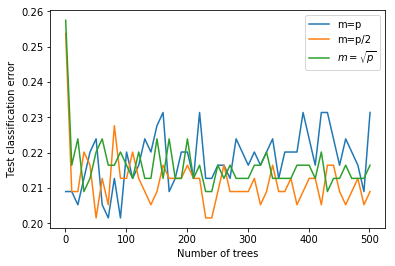

In [20]:
plt.plot(range(1,511,10),errorp,label='m=p')
plt.plot(range(1,511,10),errorpHalf,label='m=p/2')
plt.plot(range(1,511,10),errorRootP,label=r'$m=\sqrt{p}$')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Test classification error')

# Parte 2

In [49]:
oj = pd.read_csv('OJ.csv')
oj['target'] = list(map(lambda x: 0 if x=='CH' else 1, oj.Purchase))
oj = oj.drop(['Store7'],axis=1)
oj = oj.drop(['PctDiscCH','PctDiscMM'],axis=1)
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,ListPriceDiff,STORE,target
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.24,1,0
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.24,1,0
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.23,1,0
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.00,1,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.00,0,0


In [74]:
feats = oj.columns[2:-1]
print(feats)

Index(['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM',
       'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
       'PriceDiff', 'ListPriceDiff', 'STORE'],
      dtype='object')


In [75]:
all_train, all_test = train_test_split(oj,test_size= 0.5)

In [76]:
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
tclf = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=500)
clfs = {'LogisticRegression':lr,'LinearDiscriminantAnalysis':lda,'DecisionTreeClassifier':tclf,'RandomForestClassifier':rf}

In [77]:
for clf in clfs.keys():
    clfs[clf].fit(all_train[feats],all_train.target)

/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [78]:
def integrar(y,x):
    
    x = x.tolist()
    y = y.tolist()
    x.reverse()
    y.reverse()
    
    suma=0
#     print(x)
    for i in range(len(x)-1):
#         print(suma)
        dx = x[i+1]-x[i]
        suma+=dx*y[i+1]
    return suma

Text(0.5,1,'Precision-recall curves')

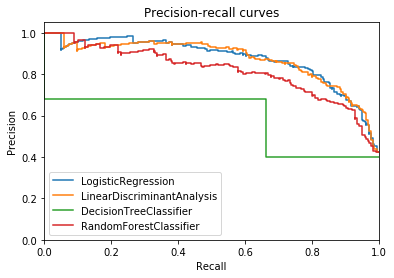

In [79]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
areas = {}
for clf in clfs.keys():
    precision, recall, _ = precision_recall_curve(all_test.target, clfs[clf].predict_proba(all_test[feats])[:,1])
    plt.step(recall, precision,
         where='post',label=clf)
    areas[clf] = integrar(precision,recall)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-recall curves")

Text(0.5,0,'Classifier')

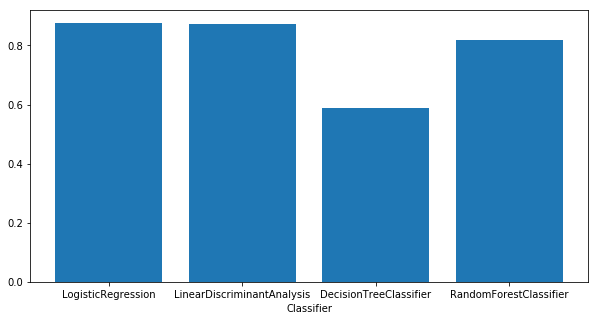

In [80]:
fig = plt.figure(figsize = (10,5))
plt.bar(np.arange(len(areas)), areas.values())
plt.xticks(np.arange(len(areas)), areas.keys())
plt.xlabel('Classifier')

Usando el area bajo la curva 

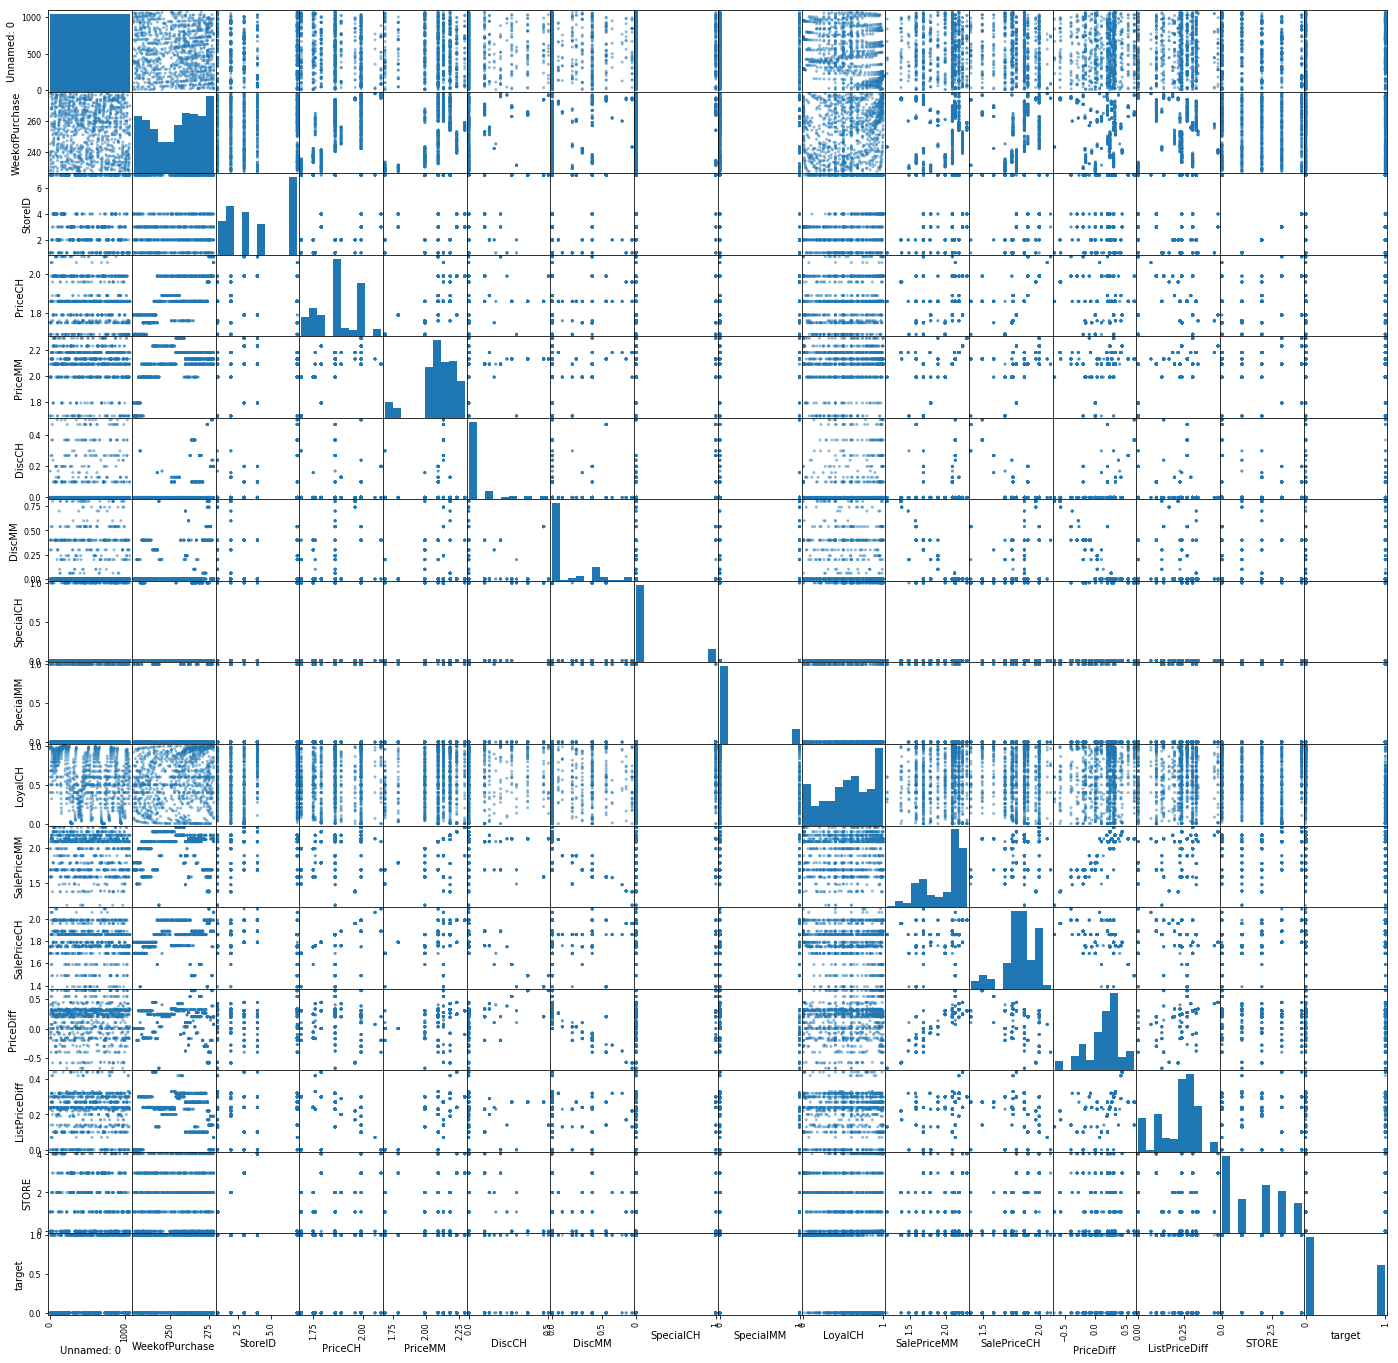

In [50]:
fig = scatter_matrix(oj, figsize=(24, 24))